# Explotación de Modelos Pre-Entrenados en Hugging Face - Transformers



## ¿Qué es Hugging Face?


* Hugging Face (https://huggingface.co/) es una web con una grandisima comunidad, que permite la los usuarios compartir y consumir modelos pre-entrenados (con técnicas de Deep Learning) dirigidos principalmente al campo del NLP.


* Su principal modo de operación gira entorno al uso de transformers; un nuevo modelo de Deep Learning presentado por google en 2017.


* También es utilizado para compartir datasets (corpus) entre otras cosas.


* En la siguiente imagen podemos ver la forma que tiene la web para la selección de modelos:

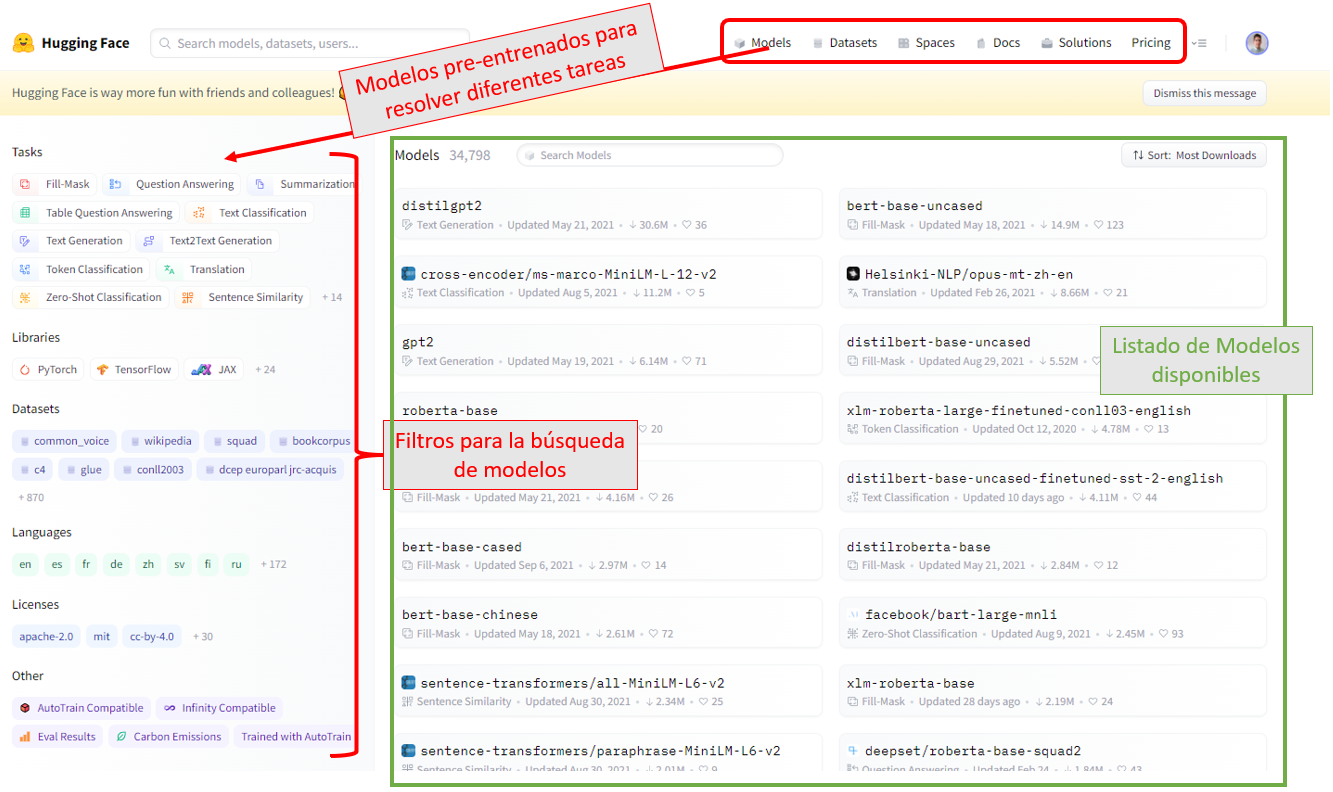


* En el siguiente enlace "https://huggingface.co/course/chapter1/1" esta disponible un curso introductorio de Hugging Face.



## ¿Qué son los Transformers?


* Los ***Transformers son modelos de deep learning***, diseñados para ***manejar datos secuenciales*** principalmente en el campo del procesamiento de lenguaje natural (NLP): traducción, clasificación, sumarización (resumenes) de textos, o bien en el campo de las series temporales como el forecasting o trading.


* Los transformers fueron presentados en 2017 en el Paper ***'Attention Is All You Need'*** por el equipo de Google: https://papers.nips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf

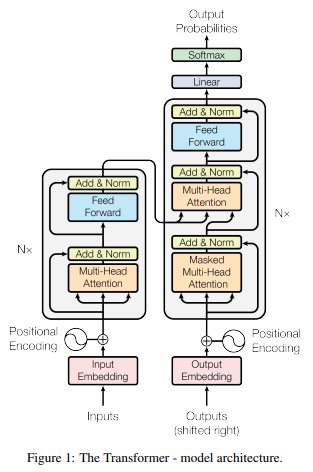

<center><h5>Imagen obtenida del paper 'Attention Is All You Need'</h5></center>


* ***La arquitectura de los Transformers*** contienen ***un sistema de encoding y decoding por capas***, acompañadas por un modelo de "self-attention".


* A diferencia de las redes neuronales recurrentes (las mejores redes hasta ese momento para el NLP), los Transformers no requieren que los datos estén ordenados; es decir, que si el input del modelo es una oración (una secuencia de palabras), el Transformer no necesita partir desde la primera palabra hasta la última secuencialmente para ofrecer la predicción. Esto le permite a los Transformers una mayor paralelización que las redes neuronales recurrentes lo que se traduce en menores tiempos de entrenamiento.


## ¿Cómo funcionan los transformers?


1. El Transformer recibe una oración de entrada y la convierte en dos secuencias:

    1.1. una **secuencia de vectores de palabras**: cada palabra del diccionario la representa como un vector
    
    1.2. una **secuencia de codificaciones posicionales**: representación vectorial de la posición de la palabra en la oración
    

2. El transformer junta ambas secuencias y pasa el resultado a través de una serie de codificadores, seguidos de una serie de decodificadores. Se puede observar en este punto como la oración de entrada se puede procesar toda a la vez y no de manera secuencial como se haría con las redes neuronales recurrentes.

3. Cada uno de los codificadores convierte su entrada en otra secuencia de vectores llamados codificaciones.

4. Los decodificadores hacen lo contrario; convertir las codificaciones en una secuencia de probabilidades de diferentes palabras de salida.

5.  Cada codificador y decodificador contiene un componente llamado mecanismo de atención, que le permite generar un contexto a cada palabra que procesa

6. Finalmente las probabilidades numéricas en la capa de salida se pueden convertir en otra oración en lenguaje natural usando la función softmax.


* Enlace de interes para comprender el detalle de los Transformers: https://deepai.org/machine-learning-glossary-and-terms/transformer-neural-network


## Modelos Pre-entrenados con Transformers:


* Existen una serie de modelos pre-entrenados (principalmente en inglés) que tiene como objetivo servir como base para posteriormento resolver tareas concretas como la clasifiación de textos, traducción, resumenes de textos, etc.


* Podemos decir que estos modelos que se muestran en la siguiente imagen (ELMo, Bert, GPT3, etc.) serian modelos que han aprendido la tarea de "saber leer" y que posteriormente son usados en los entrenamientos para resolver tareas más específicas como las antes mencionadas de clasifiación de textos, traducción, resumenes de textos, etc.

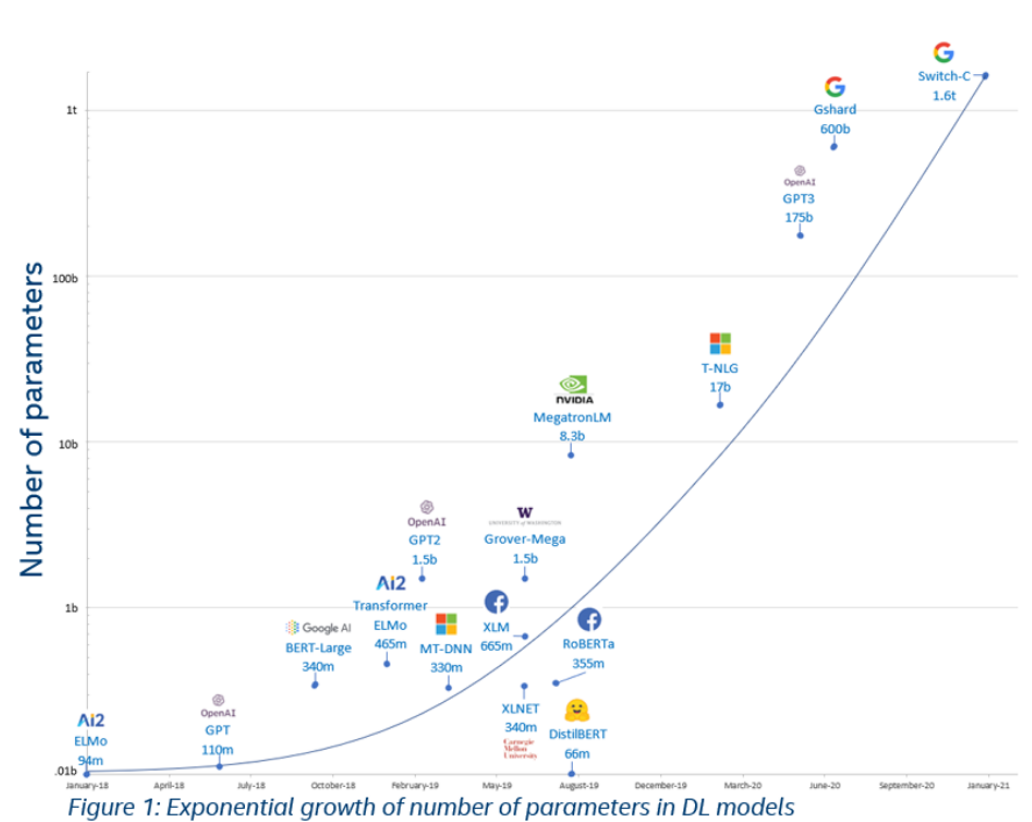

<center><h5>Imagen obtenida de: https://spyro-soft.com/blog/tomasz-smolarczyk-the-future-of-ai</h5></center>


* Existen modelos en Español como ***BETO, MarIA y BERTIN":

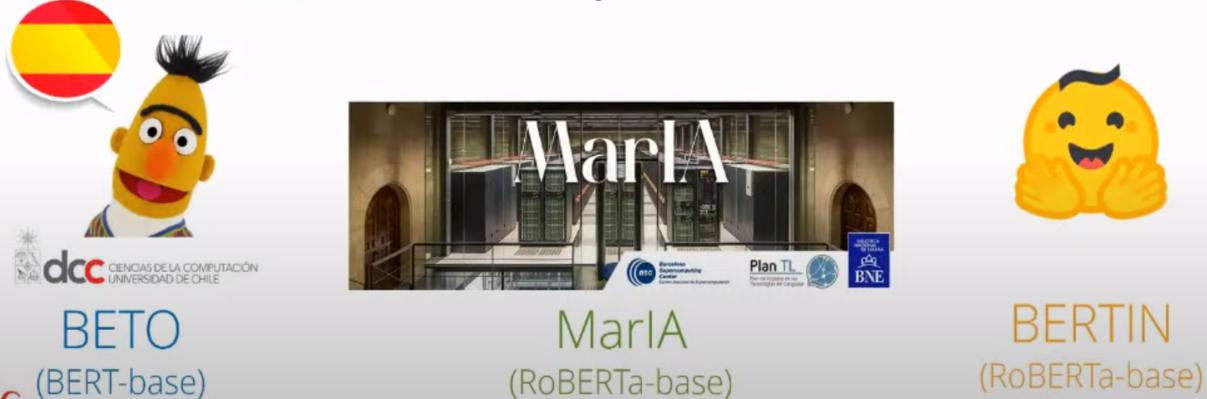

<center><h5>Imagen obtenida del video: 'Entrenando un modelo de lenguaje del español del estado del arte - Hackathon de PLN en Español': https://youtu.be/3OhArr1R2Lw</h5></center>


* En el video 'Entrenando un modelo de lenguaje del español del estado del arte - Hackathon de PLN en Español' ( https://youtu.be/3OhArr1R2Lw) un equipo del Instituto de Ingeniería del Conocimiento muestra el proceso por el cual han construido el modelo ***RigoBERTa*** para posteriormente resolver diferentes tareas.


## ¿Cómo explotamos los Modelos Pre-entrenados de Hugging Face?


* A continuación vamos a ver cómo importar y explotar los modelos disponibles en Hugging Face, para resolver las tareas de:

    1. [Clasificación](#M1)
    2. [Traducción](#M2)
    3. [Resumenes de Textos](#M3)
    4. [NER (Reconocimiento de Entidades Nombradas)](#M4)

In [ ]:
!pip install transformers==4.17.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 27.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.2 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=aaea5dc9b20222733f77906c5d6f28e0ab4a9962a9c6213ee2c20bfdb544cbcb
  Stored in directory: /root/.cache/pip/wheels/00/24/97/a2ea5324f36bc626e1ea0267f33db6aa80d157ee977e9e42fb
Successfully built sacremoses


In [ ]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.0 MB/s eta 0:00:00


In [ ]:
!pip install flair==0.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.7/508.7 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 63.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9675 sha256=4bc8ef19e9ae

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

<hr>


# <a name="M1">1.- Clasificación</a>


In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I love this car")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[{'label': 'POSITIVE', 'score': 0.9998812675476074}]

* Podemos pasar una lista de frases para su predicción:

In [ ]:
classifier(["I love this car",
            "I do not like this car"])

[{'label': 'POSITIVE', 'score': 0.9998812675476074},
 {'label': 'NEGATIVE', 'score': 0.9942150712013245}]

* A continuación un ejemplo más completo

In [ ]:
test = [('I feel happy this morning', 'POSITIVE'),
        ('Larry is my friend', 'POSITIVE'),
        ('I do not like that man', 'NEGATIVE'),
        ('My house is not great', 'NEGATIVE'),
        ('Your song is annoying', 'NEGATIVE'),
        ('The beer was good.', 'POSITIVE'),
        ('I do not enjoy my job', 'NEGATIVE'),
        ("I feel amazing!", 'POSITIVE'),
        ('Gary is a friend of mine.', 'POSITIVE'),
        ("I can't believe I'm doing this.", 'NEGATIVE')]

# Obtenemos las predicciones
pred = classifier([t[0] for t in test])

# Imprimimos la predicción, la realidad, el score y la frase
for index, prediction in enumerate(pred):
    print("Prediction: {} - Real: {} - ACIERTO: {} - Score: {} - Frase: {}"
          .format(prediction['label'],
                  test[index][1],
                  prediction['label'] == test[index][1],
                  prediction['score'],
                  test[index][0]))

Prediction: POSITIVE - Real: POSITIVE - ACIERTO: True - Score: 0.999884843826294 - Frase: I feel happy this morning
Prediction: POSITIVE - Real: POSITIVE - ACIERTO: True - Score: 0.9995887875556946 - Frase: Larry is my friend
Prediction: NEGATIVE - Real: NEGATIVE - ACIERTO: True - Score: 0.9950820207595825 - Frase: I do not like that man
Prediction: NEGATIVE - Real: NEGATIVE - ACIERTO: True - Score: 0.9997738003730774 - Frase: My house is not great
Prediction: NEGATIVE - Real: NEGATIVE - ACIERTO: True - Score: 0.9997772574424744 - Frase: Your song is annoying
Prediction: POSITIVE - Real: POSITIVE - ACIERTO: True - Score: 0.9998492002487183 - Frase: The beer was good.
Prediction: NEGATIVE - Real: NEGATIVE - ACIERTO: True - Score: 0.9997217059135437 - Frase: I do not enjoy my job
Prediction: POSITIVE - Real: POSITIVE - ACIERTO: True - Score: 0.9998800754547119 - Frase: I feel amazing!
Prediction: POSITIVE - Real: POSITIVE - ACIERTO: True - Score: 0.9997559189796448 - Frase: Gary is a fri


<hr>


## 1.1.- Selección y Explotación de modelos de clasificación ya entrenados (En Español)

* Dentro de la web de Hugging Face (https://huggingface.co/) podemos visualizar y seleccionar mediante filtros, aquellos modelos ya entrenados que puedan satisfacer las necesidades de nuestro problema.


* En el siguiente ejemplo vamos a ***seleccionar un modelo con las siguientes características***:

    1.- Modelo para la ***clasificación de textos (Análisis de Sentimientos)***
    
    2.- Que sepa clasificar textos ***en Español***.
    

* Para ello aplicamos los siguientes filtro y nos muestra la lista de modelos que sirven para clasificar textos en Español.

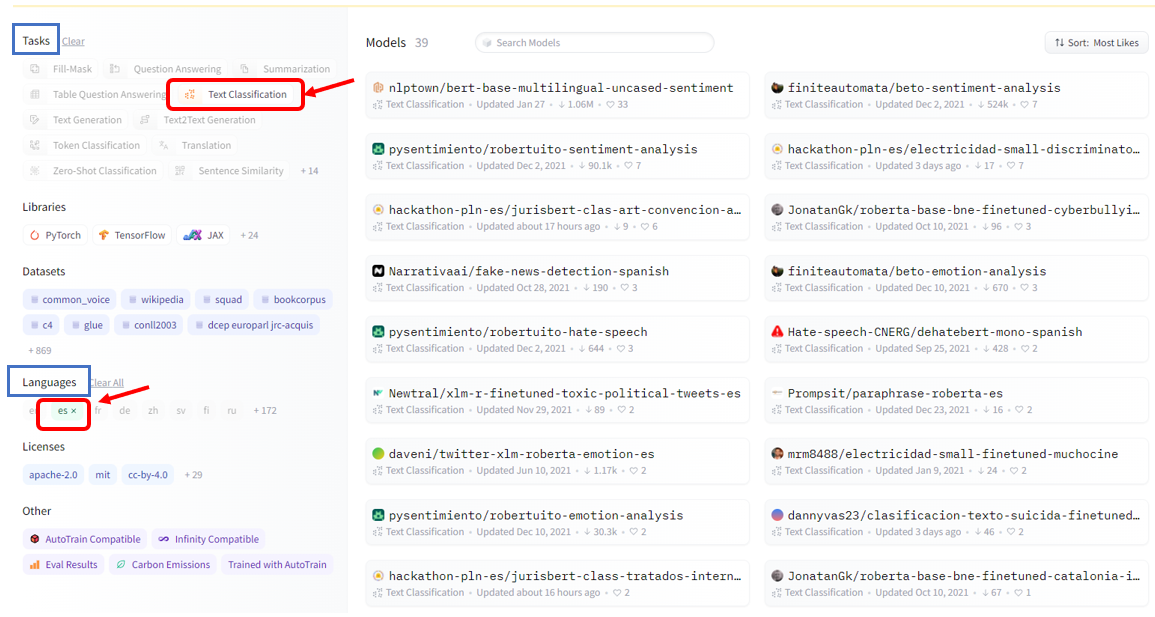


* Una vez filtrados estos modelos, tenemos que ver cuales nos permiten realizar ***clasificación de textos***, asignando; por ejemplo, una ***polaridad Positiva, Negativa o Neutra***.


* Podemos hacer uso del modelo "https://huggingface.co/finiteautomata/beto-sentiment-analysis":


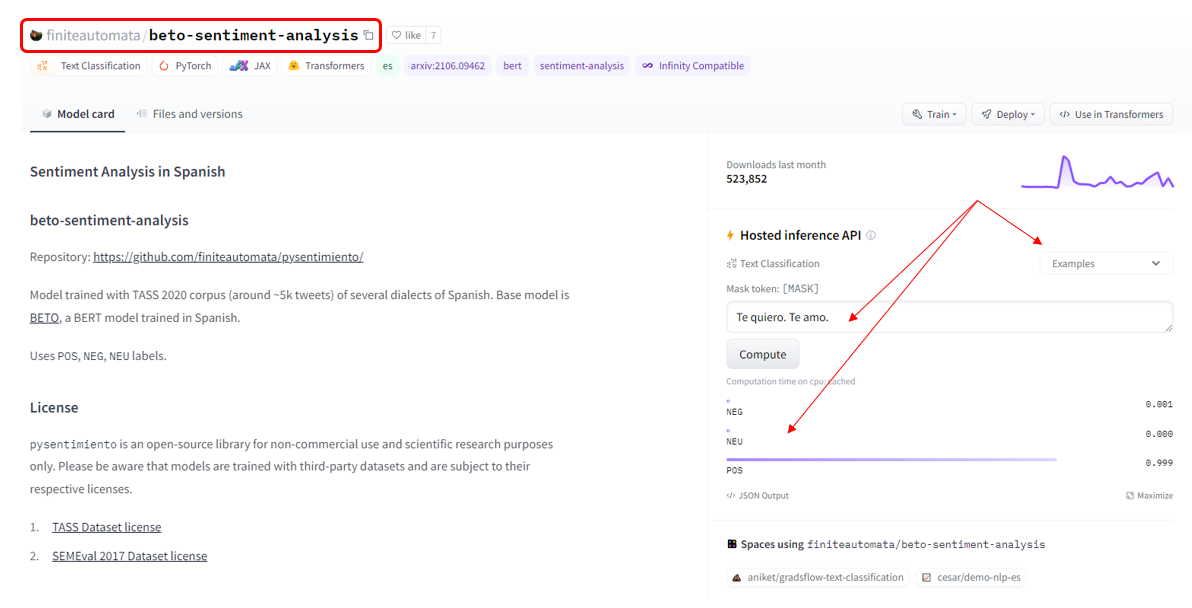


* Explotar este modelo, sería tan sencillo como indicar en el *pipeline* el modelo seleccionado (finiteautomata/beto-sentiment-analysis) y pasarle unos textos para su predicción:


In [ ]:
from transformers import pipeline

clasificador = pipeline("text-classification", model="finiteautomata/beto-sentiment-analysis")

clasificador(["Este ejemplo muy malo",
              "Este ejemplo es maravilloso"],
             return_all_scores=True)

Downloading:   0%|          | 0.00/841 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/419M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/528 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/236k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/469k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

[[{'label': 'NEG', 'score': 0.9991390705108643},
  {'label': 'NEU', 'score': 0.00025609711883589625},
  {'label': 'POS', 'score': 0.0006048274226486683}],
 [{'label': 'NEG', 'score': 0.0008638020372018218},
  {'label': 'NEU', 'score': 0.0005001439130865037},
  {'label': 'POS', 'score': 0.9986360669136047}]]

<hr>


## 1.2.- Ejemplo: Cálculo de nivel de "Toxicidad" de Tweets escritos por políticos.


* La conocida empresa *Newtral* ha creado un modelo (basado en RoBERTa) capaz de asignar a un tweet una puntuación de "toxicidad".


* Este modelo asigna una puntuación de "Toxic" (LABEL_0) y "Very Toxic" (LABEL_1) a un tweet.


* Para construir este modelo han usado un conjunto de tweets escritos por miembros del Congreso de los Diputados, etiquetados cada uno de los tweets con una puntuación de toxicidad.


* Los detalles de este modelo están en: https://huggingface.co/Newtral/xlm-r-finetuned-toxic-political-tweets-es


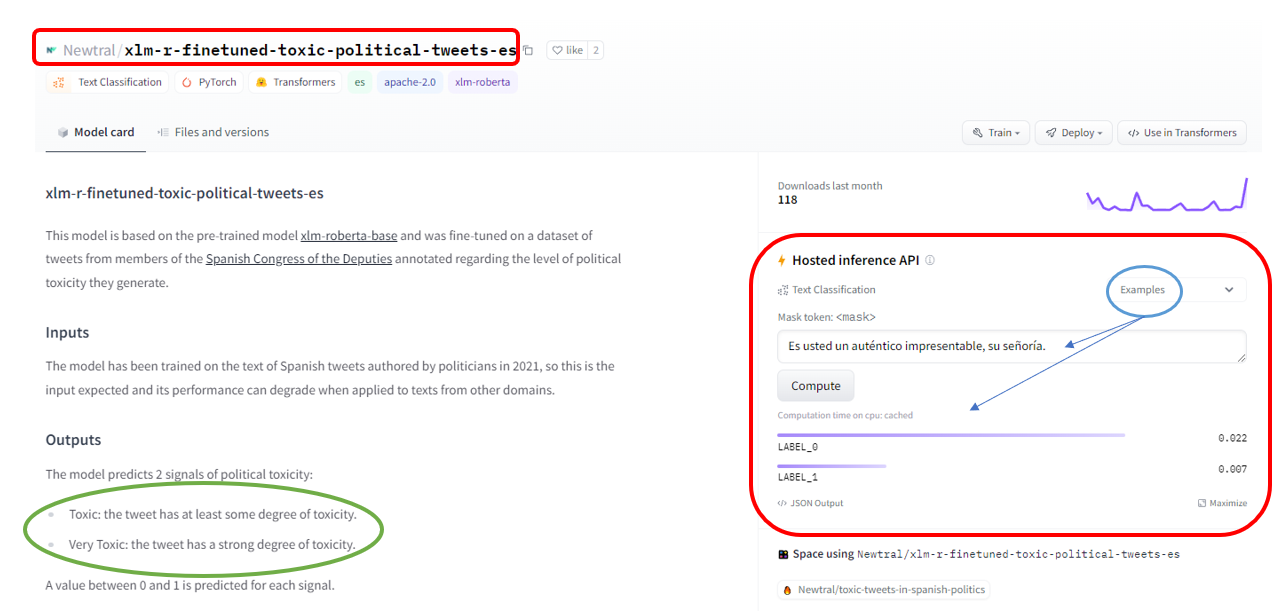

In [ ]:
from transformers import pipeline

clasificador = pipeline("text-classification",
                        model="Newtral/xlm-r-finetuned-toxic-political-tweets-es")

clasificador(["Es usted un auténtico impresentable, su señoría.",
              "Es usted un excelente parlamentario, su señoría"],
             return_all_scores=True)

Downloading:   0%|          | 0.00/753 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/421 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

[[{'label': 'LABEL_0', 'score': 0.021804768592119217},
  {'label': 'LABEL_1', 'score': 0.0066065117716789246}],
 [{'label': 'LABEL_0', 'score': 0.005288134794682264},
  {'label': 'LABEL_1', 'score': 0.003677421947941184}]]

<hr>


# <a name="M2">2.- Traducción</a>


* Enlaces de interés para ver el funcionamiento de los transformers en las tareas de traducción:

    1. https://towardsdatascience.com/transformers-141e32e69591

    2. https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/


* Modelo de traducción: https://huggingface.co/Helsinki-NLP/opus-mt-es-en

In [ ]:
import pandas as pd

from transformers import pipeline

text = "En el IIC, llevamos tiempo trabajando en modelos de lenguaje, en el marco de un proyecto de investigación que tenía como principal objetivo desarrollar este modelo propio con más y mejores datos, mayor hardware de entrenamiento y mejor arquitectura de red neuronal que otros modelos del lenguaje español."

# Instanciamos el pipeline para la traducción
translator = pipeline("translation",
                      model="Helsinki-NLP/opus-mt-es-en")

# El modelo devuelve la traducción
traduction = translator(text)

# Imprimimos el texto original y su traducción
print('TEXTO EN ESPAÑOL: \n{}'.format(text))
print('\nTEXTO TRADUCIDO: \n{}'.format(traduction))

Downloading:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/298M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/807k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/783k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52M [00:00<?, ?B/s]

TEXTO EN ESPAÑOL: 
En el IIC, llevamos tiempo trabajando en modelos de lenguaje, en el marco de un proyecto de investigación que tenía como principal objetivo desarrollar este modelo propio con más y mejores datos, mayor hardware de entrenamiento y mejor arquitectura de red neuronal que otros modelos del lenguaje español.

TEXTO TRADUCIDO: 
[{'translation_text': 'At the IIC, we have been working on language models for some time, as part of a research project that had as its main objective to develop this own model with more and better data, greater training hardware and better neural network architecture than other Spanish language models.'}]


<hr>


# <a name="M3">3.- Resumenes de Textos</a>


* Modelo para resumenes de textos: https://huggingface.co/csebuetnlp/mT5_multilingual_XLSum

In [ ]:
import pandas as pd

from transformers import pipeline


text = "Los modelos del lenguaje son redes neuronales artificiales de gran tamaño, capaces de analizar ingentes volúmenes de texto escrito para aprender la estructura con la que se presentan las palabras de un determinado idioma.\nCon este pre-entrenamiento, se convierten en modelos generales que se pueden re-entrenar con fines y corpus más específicos, ya sea para resolver una tarea concreta de PLN o para adaptarlo al lenguaje y terminología de un dominio.\nEsta tecnología está mucho más desarrollada en inglés, con modelos conocidos como BERT o GPT-3. En español no existen actualmente tantos recursos, por lo que RigoBERTa surge para contribuir al desarrollo del PLN en nuestro idioma."

# Instanciamos el pipeline para el resumen
summarizer = pipeline("summarization",
                   model="csebuetnlp/mT5_multilingual_XLSum")
resumen = summarizer(text)

# Imprimimos el texto original y su resumen
print('TEXTO ORIGINAL: \n{}'.format(text))
print('\nTEXTO RESUMIDO: \n{}'.format(resumen))

Downloading:   0%|          | 0.00/730 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.17G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.11M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


TEXTO ORIGINAL: 
Los modelos del lenguaje son redes neuronales artificiales de gran tamaño, capaces de analizar ingentes volúmenes de texto escrito para aprender la estructura con la que se presentan las palabras de un determinado idioma.
Con este pre-entrenamiento, se convierten en modelos generales que se pueden re-entrenar con fines y corpus más específicos, ya sea para resolver una tarea concreta de PLN o para adaptarlo al lenguaje y terminología de un dominio.
Esta tecnología está mucho más desarrollada en inglés, con modelos conocidos como BERT o GPT-3. En español no existen actualmente tantos recursos, por lo que RigoBERTa surge para contribuir al desarrollo del PLN en nuestro idioma.

TEXTO RESUMIDO: 
[{'summary_text': 'La tecnología Rigoberta, conocida como "Modelos del lenguaje", está siendo desarrollada en Estados Unidos.'}]


* Modelo para resumenes de textos: https://huggingface.co/mrm8488/bert2bert_shared-spanish-finetuned-summarization

In [ ]:
import pandas as pd
import torch

from transformers import BertTokenizerFast, EncoderDecoderModel

# Obtenemos un artículo de dataset del "Mundo Today"

text = "Los modelos del lenguaje son redes neuronales artificiales de gran tamaño, capaces de analizar ingentes volúmenes de texto escrito para aprender la estructura con la que se presentan las palabras de un determinado idioma.\nCon este pre-entrenamiento, se convierten en modelos generales que se pueden re-entrenar con fines y corpus más específicos, ya sea para resolver una tarea concreta de PLN o para adaptarlo al lenguaje y terminología de un dominio.\nEsta tecnología está mucho más desarrollada en inglés, con modelos conocidos como BERT o GPT-3. En español no existen actualmente tantos recursos, por lo que RigoBERTa surge para contribuir al desarrollo del PLN en nuestro idioma."

device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = BertTokenizerFast.from_pretrained('mrm8488/bert2bert_shared-spanish-finetuned-summarization')
model = EncoderDecoderModel.from_pretrained('mrm8488/bert2bert_shared-spanish-finetuned-summarization').to(device)

def generate_summary(text):
    inputs = tokenizer([text], padding="max_length", truncation=True, max_length=512, return_tensors="pt")
    input_ids = inputs.input_ids.to(device)
    attention_mask = inputs.attention_mask.to(device)
    output = model.generate(input_ids, attention_mask=attention_mask)
    return tokenizer.decode(output[0], skip_special_tokens=True)


generate_summary(text)

Downloading:   0%|          | 0.00/520 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/236k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.40k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Downloading:   0%|          | 0.00/530M [00:00<?, ?B/s]

The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']


'Los modelos del lenguaje son redes neuronales artificiales de gran tamaño, capaces de analizar ingentes volúmenes de texto escrito para aprender la estructura con la que se presentan las palabras de un idioma'

<hr>


# <a name="M4">4.- NER (Named Entity Recognition)</a>


* Los Modelos de "Reconocimiento de Entidades Nombradas" (Token Classification) también se encuentran en Hugging Face.


* Veamos a continuación un ejemplo:

In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("Leo Messi (Rosario, Santa Fe; 24 de junio de 1987); ex-jugador del FC Barcelona,"\
    " esta metiendo pocos goles en su nuevo equipo, el Paris Saint-Germain")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[{'entity_group': 'PER',
  'score': 0.99906236,
  'word': 'Leo Messi',
  'start': 0,
  'end': 9},
 {'entity_group': 'LOC',
  'score': 0.997633,
  'word': 'Rosario',
  'start': 11,
  'end': 18},
 {'entity_group': 'LOC',
  'score': 0.9976757,
  'word': 'Santa Fe',
  'start': 20,
  'end': 28},
 {'entity_group': 'ORG',
  'score': 0.99919605,
  'word': 'FC Barcelona',
  'start': 67,
  'end': 79},
 {'entity_group': 'ORG',
  'score': 0.9945101,
  'word': 'Paris Saint - Germain',
  'start': 130,
  'end': 149}]

* Un ejemplo de Modelo de NER en Español lo encontramos en: https://huggingface.co/flair/ner-spanish-large.


In [ ]:
from flair.data import Sentence
from flair.models import SequenceTagger

# load tagger
tagger = SequenceTagger.load("flair/ner-spanish-large")

# make example sentence
sentence = Sentence("Leo Messi (Rosario, Santa Fe; 24 de junio de 1987); ex-jugador del FC Barcelona,"\
                    " esta metiendo pocos goles en su nuevo equipo, el Paris Saint-Germain")

# predict NER tags
tagger.predict(sentence)

# print sentence
print(sentence)

# print predicted NER spans
print('\nThe following NER tags are found:\n')
# iterate over entities and print
for entity in sentence.get_spans('ner'):
    print(entity)

2023-10-10 22:21:41,233 loading file /root/.flair/models/ner-spanish-large/045ad6c7dc21e0eb85935dce0544eec65f8c63c58412154df4dee7ff5f11665b.d4d3456316d2951bc100d060bd63a690b33af6d273adffa1b90df32328ed3257


Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/616 [00:00<?, ?B/s]